# Redes Neurais - Perceptron de camada única
## Conforme transparência apresentada pelo professor segue a implementação descritiva dos ciclos do treinamento do perceptron de camada única, baseado na regra Hebb, para o problema da função AND.

## Dataset

In [150]:
import numpy as np

dataset = np.array([[1, 0, 0, 0],
                    [1, 0, 1, 0],
                    [1, 1, 0, 0],
                    [1, 1, 1, 1]])
w = [np.zeros(3)]
eta = 0.5

x = dataset[:, :-1]
t = dataset[:, -1]

## Funções

In [151]:
def net(x, w):
    return np.dot(x, w)

def degrau(u):
    return 1 if u > 0 else 0

def saida(x, w):
    return degrau(net(x, w))

def ajusteW(w, eta, t, y, x):
    return w + eta * (t - y) * x

## Treinamento

In [152]:
erro = True
ciclo = 1
epoca = 1
while erro:
    print(ciclo, 'º Ciclo')
    erro = False
    for i in range(len(x)):
        y = saida(x[i], w[-1])
        if y != t[i]:
            w.append(ajusteW(w[-1], eta, t[i], y, x[i]))
            erro = True
            print('Época ', epoca, ': entrada ', i, ' - pesos ajustados:', w[-1])
        else:
            print('Época ', epoca, ': entrada ', i, ' - pesos OK!')
        epoca += 1
    ciclo += 1

print('\nPesos ótimos: ', w[-1])

1 º Ciclo
Época  1 : entrada  0  - pesos OK!
Época  2 : entrada  1  - pesos OK!
Época  3 : entrada  2  - pesos OK!
Época  4 : entrada  3  - pesos ajustados: [0.5 0.5 0.5]
2 º Ciclo
Época  5 : entrada  0  - pesos ajustados: [0.  0.5 0.5]
Época  6 : entrada  1  - pesos ajustados: [-0.5  0.5  0. ]
Época  7 : entrada  2  - pesos OK!
Época  8 : entrada  3  - pesos ajustados: [0.  1.  0.5]
3 º Ciclo
Época  9 : entrada  0  - pesos OK!
Época  10 : entrada  1  - pesos ajustados: [-0.5  1.   0. ]
Época  11 : entrada  2  - pesos ajustados: [-1.   0.5  0. ]
Época  12 : entrada  3  - pesos ajustados: [-0.5  1.   0.5]
4 º Ciclo
Época  13 : entrada  0  - pesos OK!
Época  14 : entrada  1  - pesos OK!
Época  15 : entrada  2  - pesos ajustados: [-1.   0.5  0.5]
Época  16 : entrada  3  - pesos ajustados: [-0.5  1.   1. ]
5 º Ciclo
Época  17 : entrada  0  - pesos OK!
Época  18 : entrada  1  - pesos ajustados: [-1.   1.   0.5]
Época  19 : entrada  2  - pesos OK!
Época  20 : entrada  3  - pesos OK!
6 º Cicl

## Visualização da classificação após otimização dos pesos

<ipython-input-153-69730aa8e2c9>:54: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(xx, yy, Z, linestyles='dashed', linewidths=0.5, alpha=0.5, colors='r')


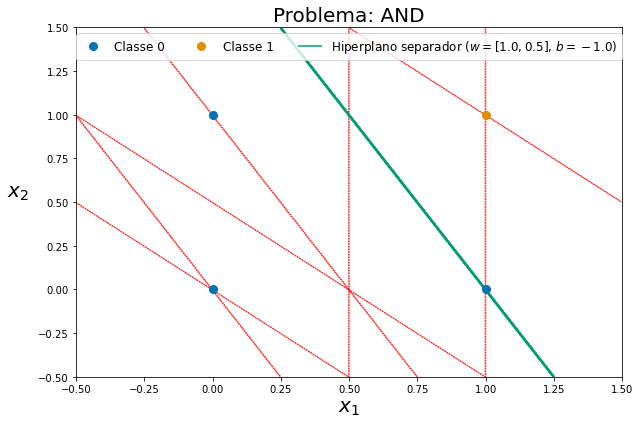

In [153]:
# Plota os dados
import seaborn as sns
import matplotlib.pyplot as plt

x = dataset[:, 1:-1]

pal = sns.color_palette('colorblind', 3)
fig, ax = plt.subplots(1)
fig.set_size_inches(9, 6)

xmin = min(x[:,0]) - 0.5
xmax = max(x[:,0]) + 0.5
ymin = min(x[:,1]) - 0.5
ymax = max(x[:,1]) + 0.5
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.set_title('Problema: AND', fontsize=20)
ax.set_xlabel('$x_1$', fontsize=20)
h = ax.set_ylabel('$x_2$', fontsize=20, labelpad=20)
h.set_rotation(0)

# Plota os pontos de cada classe
lgClass0 = None
lgClass1 = None
for x, y in zip(x, t):
    if y == 0:
        color = pal[0]
    else:
        color = pal[1]
    obj, = ax.plot([x[0]], [x[1]], c=color, marker='o', markersize=8,
                                    linestyle='None')
    if y == 0:
        lgClass0 = obj
    else:
        lgClass1 = obj

# Plota a fronteira de separação (isto é, o hiperplano definido pelos pesos)
# Para isso, usa uma grade de valores previstos com o próprio classificador
# treinado a partir dos dados

h = 0.005 # Tamanho dos "passos" para a grade a ser criada
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

for pesos in w:
    Z = []
    CS = []
    for x in np.c_[xx.ravel(), yy.ravel()]:
        Z.append(saida(np.insert(x.tolist(), 0, 1), pesos))
    Z = np.array(Z).reshape(xx.shape)
    if pesos.tolist() == w[-1].tolist():
        CS = ax.contour(xx, yy, Z, colors=[pal[2]])
    else:
        CS = ax.contour(xx, yy, Z, linestyles='dashed', linewidths=0.5, alpha=0.5, colors='r')

'''fmt = {}
strs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
display(fmt)
CS = ax.clabel(CS, inline=True, fontsize=10, fmt=fmt)'''

#ax.axis('off')
ax.figure.tight_layout()
label = 'Hiperplano separador ($w = [{:.1f}, {:.1f}]$, $b = {:.1f}$)'
ax.legend([lgClass0, lgClass1, CS.collections[0]],
          ['Classe 0', 'Classe 1', label.format(w[-1][1], w[-1][2], w[-1][0])],
          ncol=3, loc='upper center', prop={'size': 12})
plt.show()